In [31]:
# Total alternatives 23
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [58]:
def calculate_correlation_p_value(df):
    # DataFrame para guardar resultados
    results = {}
    # Iterar por las dimensiones
    for dimension in ["Environmental", "Technical", "Economical", "Social"]:
        df_dimension = df[dimension]
        correlation_matrix = df_dimension.corr()
        p_values_matrix = df_dimension.corr(
            method=lambda x, y: pearsonr(x, y)[1]
        )  # Obtención del p-value

        results[dimension] = {
            "correlation": correlation_matrix,
            "p_value": p_values_matrix,
        }
    return results


def calculate_weighted_ranking(df, weights):
    # Verificar si las columnas necesarias existen en el DataFrame
    required_columns = ["Technical", "Economical", "Environmental", "Social"]
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        raise ValueError(f"Missing columns in DataFrame: {', '.join(missing_columns)}")

    # Sumar rankings ponderados por dimensión
    df["Weighted_Ranking"] = (
        df["Technical"] * weights["Technical"]
        + df["Economical"] * weights["Economical"]
        + df["Environmental"] * weights["Environmental"]
        + df["Social"] * weights["Social"]
    )
    return df


def prepare_dataframe(df, analysis_dict):
    # Suponiendo que tienes alguna lógica para calcular estas columnas

    df["Technical"] = analysis_dict["Technical"]
    df["Economical"] = analysis_dict["Economical"]
    df["Environmental"] = analysis_dict["Environmental"]
    df["Social"] = analysis_dict["Social"]
    return df

In [60]:
# 1. Heatmap de Correlación
def plot_correlation_heatmap(correlation_matrix, dimension):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Correlation Heatmap - {dimension} Dimension")
    plt.show()


# 2. Heatmap de Valores p
def plot_p_value_heatmap(p_values_matrix, dimension):
    plt.figure(figsize=(10, 8))
    sns.heatmap(p_values_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=0.05)
    plt.title(f"p-value Heatmap - {dimension} Dimension")
    plt.show()


# 3. Gráfico de Barras Apiladas para Rankings Ponderados
def plot_stacked_bar(df):
    df_ranking = df[
        [
            "Alternative",
            "Technical",
            "Economical",
            "Environmental",
            "Social",
        ]
    ]
    df_ranking.set_index("Alternative", inplace=True)
    df_ranking.plot(kind="bar", stacked=True, figsize=(12, 8))
    plt.title("Stacked Bar Plot - Weighted Rankings by Dimension")
    plt.ylabel("Weighted Ranking")
    plt.show()


# 4. Gráfico de Radar para Comparación Multidimensional
def plot_radar_chart(df, alternatives):
    # Setup Radar Chart
    categories = ["Technical", "Economical", "Environmental", "Social"]
    N = len(categories)

    for alt in alternatives:
        values = (
            df[df["Alternative"] == alt][
                [
                    "Technical",
                    "Economical",
                    "Environmental",
                    "Social",
                ]
            ]
            .values.flatten()
            .tolist()
        )
        values += values[:1]  # Repetir el primer valor al final para cerrar el gráfico
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
        angles += angles[:1]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, values, color="blue", alpha=0.25)
        ax.plot(angles, values, color="blue", linewidth=2)
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        plt.title(f"Radar Chart for {alt}")
        plt.show()


# 5. Boxplot por Dimensión
def plot_boxplot_by_dimension(df, dimension):
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=df[dimension])
    plt.title(f"Boxplot for {dimension} Dimension")
    plt.show()

In [55]:
def heatmaps(df):
    df_dummy = df.copy()
    df_dummy.drop(columns=["Alternative"], inplace=True)
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_dummy.corr(), annot=True)

    # Display the heatmap
    df_environmental = df_dummy[
        [
            "Scenario 16",
            "Scenario 17",
            "Scenario 18",
            "Scenario 19",
            "Scenario 20",
            "Scenario 21",
            "Scenario 22",
        ]
    ].copy()

    df_technical = df_dummy[
        [
            "Scenario 2",
            "Scenario 3",
            "Scenario 4",
            "Scenario 5",
            "Scenario 6",
            "Scenario 7",
            "Scenario 8",
        ]
    ].copy()

    df_economical = df_dummy[
        [
            "Scenario 9",
            "Scenario 10",
            "Scenario 11",
            "Scenario 12",
            "Scenario 13",
            "Scenario 14",
            "Scenario 15",
        ]
    ].copy()

    df_social = df_dummy[
        [
            "Scenario 23",
            "Scenario 24",
            "Scenario 25",
            "Scenario 26",
            "Scenario 27",
            "Scenario 28",
            "Scenario 29",
        ]
    ].copy()

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
    sns.heatmap(df_environmental.corr(), annot=True, ax=ax1)
    ax1.set_title("Environmental dimension")
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
    ax1.tick_params(axis="both", which="both", length=0)

    sns.heatmap(df_technical.corr(), annot=True, ax=ax2)
    ax2.set_title("Technical dimension")
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
    ax2.tick_params(axis="both", which="both", length=0)

    sns.heatmap(df_economical.corr(), annot=True, ax=ax3)
    ax3.set_title("Economical dimension")
    ax3.set_xlabel("")
    ax3.set_ylabel("")
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha="right")
    ax3.set_yticklabels(ax3.get_yticklabels(), rotation=0)
    ax3.tick_params(axis="both", which="both", length=0)

    sns.heatmap(df_social.corr(), annot=True, ax=ax4)
    ax4.set_title("Social dimension")
    ax4.set_xlabel("")
    ax4.set_ylabel("")
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha="right")
    ax4.set_yticklabels(ax4.get_yticklabels(), rotation=0)
    ax4.tick_params(axis="both", which="both", length=0)

    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Crear un diccionario con los DataFrames por dimensión
    analysis_dict = {
        "Technical": df_technical,
        "Economical": df_economical,
        "Environmental": df_environmental,
        "Social": df_social,
    }

    # Definir pesos (puedes ajustar según tu criterio)
    weights = {"Technical": 0.25, "Economical": 0.25, "Environmental": 0.25, "Social": 0.25}

    # Calcular la correlación y el valor p
    correlation_p_value_results = calculate_correlation_p_value(analysis_dict)

    # Calcular los rankings ponderados
    df_weighted_ranking = calculate_weighted_ranking(df, weights)



    # Gráficos
    plot_correlation_heatmap(
        correlation_p_value_results["Technical"]["correlation"], "Technical"
    )
    plot_p_value_heatmap(
        correlation_p_value_results["Technical"]["p_value"], "Technical"
    )
    plot_correlation_heatmap(
        correlation_p_value_results["Economical"]["correlation"], "Economical"
    )
    plot_p_value_heatmap(
        correlation_p_value_results["Economical"]["p_value"], "Economical"
    )
    plot_correlation_heatmap(
        correlation_p_value_results["Environmental"]["correlation"], "Environmental"
    )
    plot_p_value_heatmap(
        correlation_p_value_results["Environmental"]["p_value"], "Environmental"
    )
    plot_correlation_heatmap(
        correlation_p_value_results["Social"]["correlation"], "Social"
    )
    plot_p_value_heatmap(correlation_p_value_results["Social"]["p_value"], "Social")

    # Corregir el gráfico de barras apiladas para rankings ponderados
    plot_stacked_bar(df_weighted_ranking)

    # Gráficos adicionales
    plot_radar_chart(df_weighted_ranking, df["Alternative"].tolist())
    plot_boxplot_by_dimension(df_weighted_ranking, "Technical")
    plot_boxplot_by_dimension(df_weighted_ranking, "Economical")
    plot_boxplot_by_dimension(df_weighted_ranking, "Environmental")
    plot_boxplot_by_dimension(df_weighted_ranking, "Social")

    # Mostrar la visualización
    plt.show()

In [61]:
def analysis(df):
    df_dummy = df.copy()
    df_dummy.drop(columns=["Alternative"], inplace=True)

    # Crear un diccionario para almacenar los DataFrames por dimensión
    analysis_dict = {}

    # Verificar y crear DataFrames para cada dimensión
    if all(col in df_dummy.columns for col in ["Scenario 2", "Scenario 3", "Scenario 4", "Scenario 5", "Scenario 6", "Scenario 7", "Scenario 8"]):
        df_technical = df_dummy[
            [
                "Scenario 2",
                "Scenario 3",
                "Scenario 4",
                "Scenario 5",
                "Scenario 6",
                "Scenario 7",
                "Scenario 8",
            ]
        ].copy()
        analysis_dict["Technical"] = df_technical

    if all(col in df_dummy.columns for col in ["Scenario 9", "Scenario 10", "Scenario 11", "Scenario 12", "Scenario 13", "Scenario 14", "Scenario 15"]):
        df_economical = df_dummy[
            [
                "Scenario 9",
                "Scenario 10",
                "Scenario 11",
                "Scenario 12",
                "Scenario 13",
                "Scenario 14",
                "Scenario 15",
            ]
        ].copy()
        analysis_dict["Economical"] = df_economical

    if all(col in df_dummy.columns for col in ["Scenario 16", "Scenario 17", "Scenario 18", "Scenario 19", "Scenario 20", "Scenario 21", "Scenario 22"]):
        df_environmental = df_dummy[
            [
                "Scenario 16",
                "Scenario 17",
                "Scenario 18",
                "Scenario 19",
                "Scenario 20",
                "Scenario 21",
                "Scenario 22",
            ]
        ].copy()
        analysis_dict["Environmental"] = df_environmental

    if all(col in df_dummy.columns for col in ["Scenario 23", "Scenario 24", "Scenario 25", "Scenario 26", "Scenario 27", "Scenario 28", "Scenario 29"]):
        df_social = df_dummy[
            [
                "Scenario 23",
                "Scenario 24",
                "Scenario 25",
                "Scenario 26",
                "Scenario 27",
                "Scenario 28",
                "Scenario 29",
            ]
        ].copy()
        analysis_dict["Social"] = df_social

    # Crear los heatmaps solo para las dimensiones disponibles
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()
    for i, (dimension, df_dimension) in enumerate(analysis_dict.items()):
        sns.heatmap(df_dimension.corr(), annot=True, ax=axes[i])
        axes[i].set_title(f"{dimension} dimension")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0)
        axes[i].tick_params(axis="both", which="both", length=0)

    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Definir pesos (puedes ajustar según tu criterio)
    weights = {"Technical": 0.25, "Economical": 0.25, "Environmental": 0.25, "Social": 0.25}

    # Calcular la correlación y el valor p
    correlation_p_value_results = calculate_correlation_p_value(analysis_dict)

    # Calcular los rankings ponderados
    df = prepare_dataframe(df, analysis_dict)
    df_weighted_ranking = calculate_weighted_ranking(df, weights)

    # Gráficos
    for dimension in analysis_dict.keys():
        plot_correlation_heatmap(
            correlation_p_value_results[dimension]["correlation"], dimension
        )
        plot_p_value_heatmap(
            correlation_p_value_results[dimension]["p_value"], dimension
        )

    # Corregir el gráfico de barras apiladas para rankings ponderados
    plot_stacked_bar(df_weighted_ranking)

    # Gráficos adicionales
    plot_radar_chart(df_weighted_ranking, df["Alternative"].tolist())
    for dimension in analysis_dict.keys():
        plot_boxplot_by_dimension(df_weighted_ranking, dimension)

    # Mostrar la visualización
    plt.show()

ValueError: Cannot set a DataFrame with multiple columns to the single column Technical

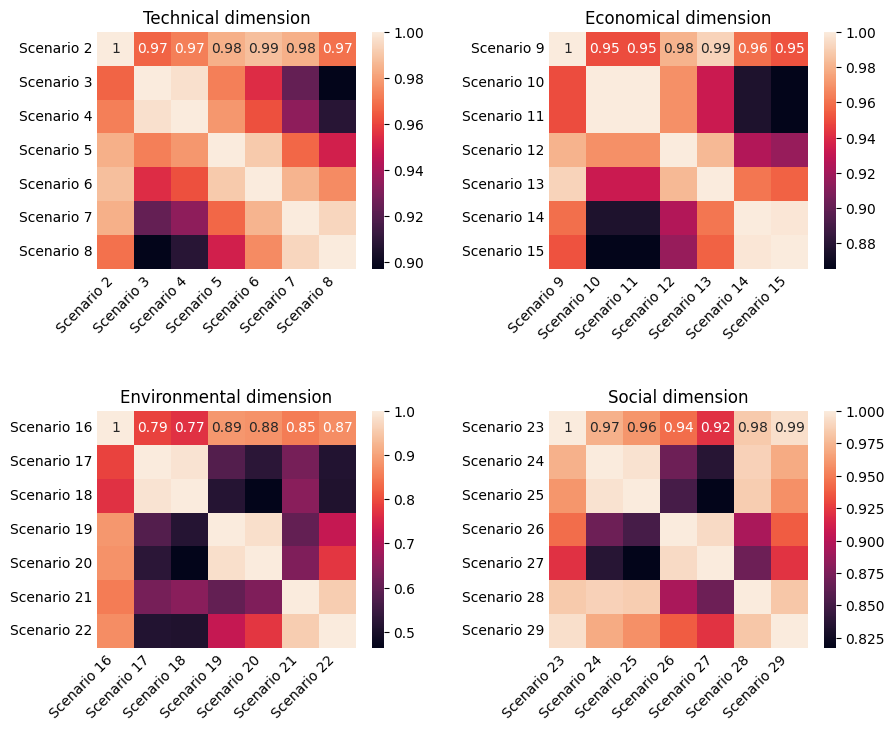

In [62]:
CASE_STUDY = "jamundi"
FILE = f"../case_studies/results/{CASE_STUDY}/ranking_of_23_alternatives.xlsx"
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(FILE)
df.rename(columns={"Unnamed: 0": "Alternative"}, inplace=True)
df.head()
analysis(df)

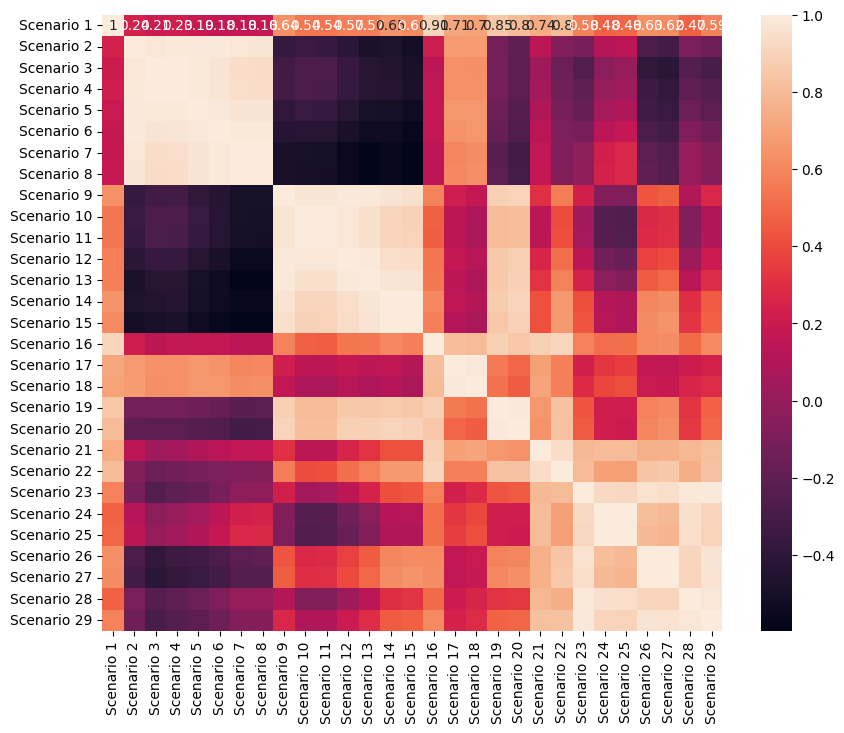

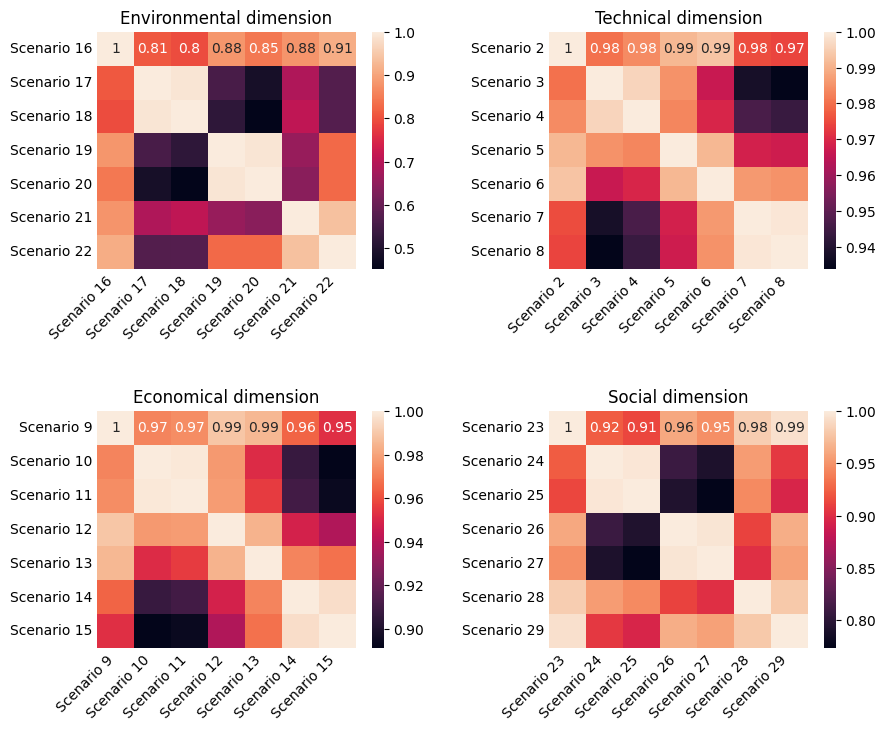

In [40]:
CASE_STUDY = "santa_rosalia"
FILE = f"../case_studies/results/{CASE_STUDY}/ranking_of_23_alternatives.xlsx"
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(FILE)
df.rename(columns={"Unnamed: 0": "Alternative"}, inplace=True)
df.head()
heatmaps(df)